In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import Perc_code as p

The below code is a modification of the example provided by:\
https://analyticsindiamag.com/perceptron-is-the-only-neural-network-without-any-hidden-layer/

In [2]:
# activitaion function
def ActivFunc(v):
    x = (1 - np.exp(-2*v))/(1 + np.exp(-2*v))
    if x < 0:
        x = 0
    else:
        x = 1
    return x
    


In [3]:
x = 0.0 
print(int(x!=0.0))

0


In [4]:
class Perceptron(object):
    """
    self - the thing.
    learning_rate - the wieght, eta.
    random_state - to see later.
    """
    
    # constractor
    def __init__(self, learning_rate=0.01, n_iter=100, random_state=1):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.random_state = random_state
        
    # maps the traings data X and the target Y
    def fit(self, X, y):
        rand = np.random.RandomState(self.random_state)
        
        # create a vector of weights of of size 'size of x + 1' with first entery as bias.
        self.weights = rand.normal(loc=0.0, scale=0.01, size=1 +  X.shape[1])
        
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for x, target in zip(X, y):
                # the update delta= eta(d-x)
                update = self.learning_rate * (target - self.predict(x))
                
                # We update the weight
                self.weights[1:] += update * x
                
                # We update the bias
                self.weights[0] += update 
                
                # if the update is not zero, then we have an error.
                errors += int(update != 0.0)
                self.errors_.append(errors)
                #if update != 0.0: 
                #    errors += int(update)    
                # add the error
                self.errors_.append(errors)
            
            #plot_data(self, X,y, self.weights[1:])
            
            return self
        
    # activition function
    def net_input(self, X):
        # \vec x \dot \vec w + bias
        z = np.dot(X, self.weights[1:]) + self.weights[0] #bias is the first entry in the weight vector
        # varphi(func z)
        z = ActivFunc(z)
        # print(z)
        return z
    
    
    #https://numpy.org/doc/stable/reference/generated/numpy.where.html
    def predict(self, X):
        # if get back a vector of 1,-1 where 1 is for positive function from the activision function
        return np.where(self.net_input(X) >= 0, 1, -1)
    
    
    
    #aux function, not working yet
    
    #https://stats.stackexchange.com/questions/71335/decision-boundary-plot-for-a-perceptron
    def plot_data(self,inputs,targets,weights):
        # fig config
        plt.figure(figsize=(10,6))
        plt.grid(True)

        #plot input samples(2D data points) and i have two classes. 
        #one is +1 and second one is -1, so it red color for +1 and blue color for -1
        for input,target in zip(inputs,targets):
            plt.plot(input[0],input[1],'ro' if (target == 1.0) else 'bo')

        # Here i am calculating slope and intercept with given three weights
        for i in np.linspace(np.amin(inputs[:,:1]),np.amax(inputs[:,:1])):
            slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
            intercept = -weights[0]/weights[2]

            #y =mx+c, m is slope and c is intercept
            y = (slope*i) + intercept
            plt.plot(i, y,'ko')

Now we load a dataset to perform the algorithm on, we load the data in the form:

$$X_i = [x_i\text{-cordinate}, y_i\text{-cordinate},\text{property} ],\quad \vec y = (y_1,y_2,\dots)-\text{target}$$

In [5]:
%matplotlib inline
#https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

# return the data and the target
X,y = load_iris(return_X_y=True)

And we plot it using the 'scatter' method

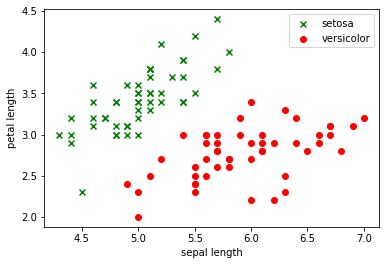

In [6]:
# plt.scatter(x, y,...)

# first fifty enteries
plt.scatter(X[:50, 0], X[:50, 1],
            color='green', marker='x', label='setosa')

# last thifty entires
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='red', marker='o', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper right')
plt.show()

Performing the algorithm

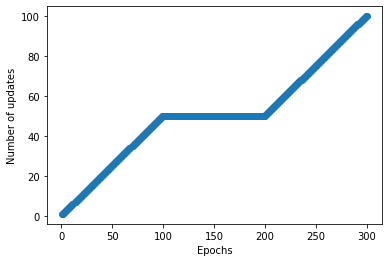

In [7]:
per = Perceptron(learning_rate=0.1, n_iter=100, random_state=1)
per.fit(X, y)
plt.plot(range(1, len(per.errors_) + 1), per.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

Now let us see the plot for the data (Still work in process so its wrong ... for now)

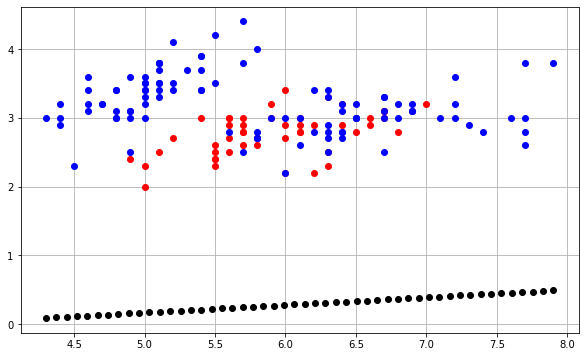

In [8]:
per.plot_data(X,y, per.weights[1:])

NameError: name 'Z' is not defined

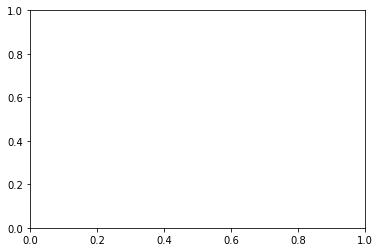

In [9]:
#https://stats.stackexchange.com/questions/71335/decision-boundary-plot-for-a-perceptron

import numpy as np
#from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

X = np.array([[2,1],[3,4],[4,2],[3,1]])
Y = np.array([0,0,1,1])
h = .02  # step size in the mesh


# we create an instance of SVM and fit our data. We do not scale our
# data since we want to plot the support vectors

clf = Perceptron(learning_rate=0.1, n_iter=100, random_state=1)
clf.fit(X, Y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots()
#Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

ax.set_title('Perceptron')

In [ ]:
d = p.load_data()